# [作業目標]
使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵 

觀察上述離散化特徵, 對於目標值的預測有沒有幫助 

# [作業重點]
仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化 

繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖 


In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [3]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [4]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

# 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [6]:
employed_data = app_train[['TARGET', 'DAYS_EMPLOYED','AMT_INCOME_TOTAL']]
employed_data['YEARS_EMPLOYED'] = employed_data['DAYS_EMPLOYED'] / -(365)
bins = [0,5,10,20,30,np.inf]
labels = ['0~5','5~10','10~20','20~30','30~']
# 新增欄位 "equal_width_age", 對年齡做等寬劃分
employed_data["equal_width_employed"] = pd.cut(employed_data['YEARS_EMPLOYED'], bins,labels = labels)
employed_data.head()

/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,TARGET,DAYS_EMPLOYED,AMT_INCOME_TOTAL,YEARS_EMPLOYED,equal_width_employed
0,1,-637.0,202500.0,1.745205,0~5
1,0,-1188.0,270000.0,3.254795,0~5
2,0,-225.0,67500.0,0.616438,0~5
3,0,-3039.0,135000.0,8.326027,5~10
4,0,-3038.0,121500.0,8.323288,5~10


In [7]:
employed_group = employed_data.groupby('equal_width_employed').mean()
employed_group

,TARGET,DAYS_EMPLOYED,AMT_INCOME_TOTAL,YEARS_EMPLOYED
equal_width_employed,,,,
0~5,0.105708,-864.340763,171560.504381,2.368057
5~10,0.073714,-2630.224689,180205.755523,7.206095
10~20,0.055133,-4986.763581,185018.399782,13.662366
20~30,0.044917,-8740.054130,172787.377149,23.945354
30~,0.032280,-12557.049917,174365.141481,34.402876


<Figure size 576x576 with 0 Axes>

'\nYour Code Here\n'

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

Text(0.5,0,'Employed Group (years)')

Text(0,0.5,'Failure to Repay (%)')

Text(0.5,1,'Failure to Repay by Employed Group')

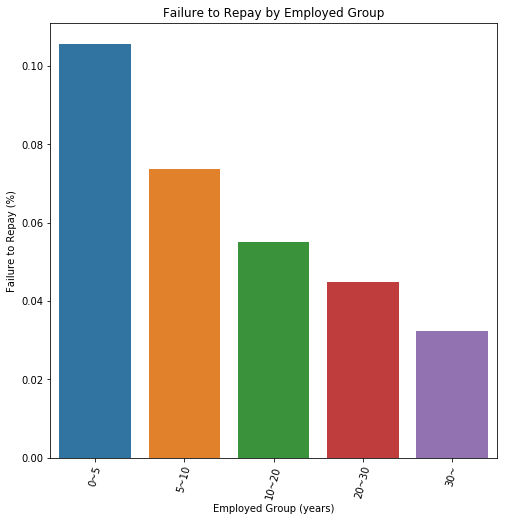

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

Text(0.5,0,'Employed Group (years)')

Text(0,0.5,'AMT_INCOME_TOTAL (MEAN)')

Text(0.5,1,'Failure to Repay by Employed Group')

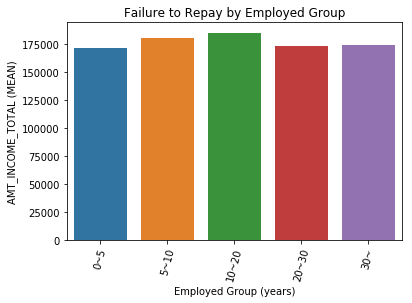

In [8]:
import seaborn as sns 
plt.figure(figsize = (8, 8))

# 以年齡區間為 x, target 為 y 繪製 barplot
"""
Your Code Here
"""
px = employed_group.index
py = employed_group['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Employed Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Employed Group')
plt.show()

px = employed_group.index
py = employed_group['AMT_INCOME_TOTAL']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Employed Group (years)'); plt.ylabel('AMT_INCOME_TOTAL (MEAN)')
plt.title('Failure to Repay by Employed Group')
plt.show()